# Data Science Salaries 2020-2023 Data Analysis

### 1. Import Relevant Libraries/Packages

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 2. Load Dataset

In [62]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


### 3. Data Exploration

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [64]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [65]:
df.describe(include='O').transpose()

,count,unique,top,freq
experience_level,3755,4,SE,2516
employment_type,3755,4,FT,3718
job_title,3755,93,Data Engineer,1040
salary_currency,3755,20,USD,3224
employee_residence,3755,78,US,3004
company_location,3755,72,US,3040
company_size,3755,3,M,3153


In [66]:
df.shape

(3755, 11)

In [67]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [68]:
df.duplicated().sum()

np.int64(1171)

In [69]:
# top 5 highest paying records
df.nlargest(5, 'salary_in_usd')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3522,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
2011,2022,MI,FT,Data Analyst,350000,GBP,430967,GB,0,GB,M
528,2023,SE,FT,AI Scientist,1500000,ILS,423834,IL,0,IL,L
3747,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
3675,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S


In [70]:
# top 5 lowest paying records
df.nsmallest(5, 'salary_in_usd')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2684,2022,MI,FT,NLP Engineer,120000,CZK,5132,CZ,100,CZ,M
2578,2021,EN,FT,Power BI Developer,400000,INR,5409,IN,50,IN,L
3537,2021,MI,PT,3D Computer Vision Researcher,400000,INR,5409,IN,50,IN,M
3667,2021,MI,FT,Data Scientist,420000,INR,5679,IN,100,US,S
3685,2020,EN,FT,Data Science Consultant,423000,INR,5707,IN,50,IN,M


In [71]:
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [72]:
# Grouping by work_year and calculating the mean salary
df.groupby('work_year')['salary_in_usd'].mean().sort_values(ascending=False)

work_year
2023    149045.541176
2022    133338.620793
2021     94087.208696
2020     92302.631579
Name: salary_in_usd, dtype: float64

In [73]:
# Grouping by experience and calculating the mean salary
df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)

experience_level
EX    194930.929825
SE    153051.071542
MI    104525.939130
EN     78546.284375
Name: salary_in_usd, dtype: float64

In [74]:
# Grouping by employment_type and calculating the mean salary
df.groupby('employment_type')['salary_in_usd'].mean().sort_values(ascending=False)

employment_type
FT    138314.199570
CT    113446.900000
FL     51807.800000
PT     39533.705882
Name: salary_in_usd, dtype: float64

In [75]:
# Top five employee residence with highest average salary where job title is data scientist
df[df['job_title'] == 'Data Scientist'].groupby('employee_residence')['salary_in_usd'].mean().nlargest(5)

employee_residence
US    159345.832084
CA    138567.090909
CH    120747.500000
SG    119059.000000
IE    115514.750000
Name: salary_in_usd, dtype: float64

In [76]:
# Top five employee residence with highest average salary where job title is data analyst
df[df['job_title'] == 'Data Analyst'].groupby('employee_residence')['salary_in_usd'].mean().nlargest(5)

employee_residence
CN    125404.000000
US    117505.387283
UZ    100000.000000
CA     92440.562500
HR     91142.500000
Name: salary_in_usd, dtype: float64

In [77]:
# Grouping by remote ratio and calculating the mean salary
df.groupby('remote_ratio')['salary_in_usd'].mean().sort_values(ascending=False)

remote_ratio
0      144316.202288
100    136481.452830
50      78400.687831
Name: salary_in_usd, dtype: float64

In [78]:
# Grouping by company_size and calculating the mean salary
df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False)

company_size
M    143130.548367
L    118300.982379
S     78226.682432
Name: salary_in_usd, dtype: float64

### 4. Data Preprocessing

Let's drop the 'salary' and 'salary_currency' columns because these both columns don't give so much value in our analysis. We have column 'salary_in_usd' which give us the  information of salary and all salary records are in same currency.

In [79]:
df = df.drop(['salary','salary_currency'], axis=1)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [80]:
# Let's perform some feature engineering or value transformation

# Transforming experience level to full form in place of abbreviation
df['experience_level'] = df['experience_level'].map({'SE': 'Senior', 'EN': 'Entry-Level', 'EX': 'Executive', 'MI': 'Mid-Level'})

# Transforming employment type to full form in place of abbreviation
df['employment_type'] = df['employment_type'].map({'FT': 'Full-Time', 'PT': 'Part-Time', 'CT': 'Contract', 'FL': 'Freelance'})

# Transforming remote ratio to full form in place of numerical value
df['remote_ratio'] = df['remote_ratio'].map({100: 'Fully Remote', 50: 'Hybrid', 0: 'Onsite'})

# Transforming company size to full form in place of abbreviation
df['company_size'] = df['company_size'].map({'S': 'Small', 'M': 'Medium', 'L': 'Large'})

In [81]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-Time,Principal Data Scientist,85847,ES,Fully Remote,ES,Large
1,2023,Mid-Level,Contract,ML Engineer,30000,US,Fully Remote,US,Small
2,2023,Mid-Level,Contract,ML Engineer,25500,US,Fully Remote,US,Small
3,2023,Senior,Full-Time,Data Scientist,175000,CA,Fully Remote,CA,Medium
4,2023,Senior,Full-Time,Data Scientist,120000,CA,Fully Remote,CA,Medium


In [82]:
df['job_title'].value_counts()

job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
                             ... 
Principal Data Architect        1
Head of Machine Learning        1
Cloud Data Architect            1
Staff Data Scientist            1
Finance Data Analyst            1
Name: count, Length: 93, dtype: int64

**Important:** We need to deal with this 'job_title' column because this column contain lot's of values with kind of same working profession like: 'data scientist' and 'head data scientist' is almost same profession, the position is main difference. Another example, 'data analyst' and 'finance data analyst' or 'cloud data analyst' or 'market analyst' is also kind of same profession, although their domain might be different but working is almost same. So, we need to deal with this issue. 

In [83]:
# Let's make some similar profession values same with contain word 'Data Scientist'
def data_science(x):
    if 'Data Scientist' in x:
        return 'Data Scientist'
    elif 'Data Science' in x:
        return 'Data Scientist'
    else:
        return x

df['job_title'] = df['job_title'].apply(lambda x: data_science(x))

In [84]:
# Let's make some similar profession values same with contain word 'Data Analyst'
def data_analyst(x):
    if 'Data Analyst' in x:
        return 'Data Analyst'
    elif 'Data Analysis' in x:
        return 'Data Analyst'
    elif 'Data Analytics' in x:
        return 'Data Analyst'
    elif 'Analyst' in x:
        return 'Data Analyst'
    elif 'BI Developer' in x:
        return 'Data Analyst'
    elif 'Power BI Developer' in x:
        return 'Data Analyst'
    else:
        return x
    
df['job_title'] = df['job_title'].apply(lambda x: data_analyst(x))

In [85]:
# Let's make some similar profession values same with contain word 'Machine Learning Engineer'
def machine_learning(x):
    if 'Machine Learning Engineer' in x:
        return 'Machine Learning Engineer'
    elif 'Machine Learning' in x:
        return 'Machine Learning Engineer'
    elif 'ML Engineer' in x:
        return 'Machine Learning Engineer'
    elif 'MLOps Engineer' in x:
        return 'Machine Learning Engineer'
    else:
        return x

df['job_title'] = df['job_title'].apply(lambda x: machine_learning(x))

In [86]:
# Let's make some similar profession values same with contain word 'Data Engineer'
def data_engineer(x):
    if 'Data Engineer' in x:
        return 'Data Engineer'
    elif 'Data Engineering' in x:
        return 'Data Engineer'
    elif 'Analytics Engineer' in x:
        return 'Data Engineer'
    elif 'ETL Engineer' in x:
        return 'Data Engineer'
    elif 'Big Data Engineer' in x:
        return 'Data Engineer'
    elif 'Data Infrastructure Engineer' in x:
        return 'Data Engineer'
    elif 'Data Operations Engineer' in x:
        return 'Data Engineer'
    elif 'ETL Developer' in x:
        return 'Data Engineer'
    elif 'Business Intelligence Engineer' in x:
        return 'Data Engineer'
    elif 'Cloud Database Engineer' in x:
        return 'Data Engineer'
    else:
        return x
df['job_title'] = df['job_title'].apply(lambda x: data_engineer(x))

In [87]:
# Let's make some similar profession values same with contain word 'Data Architect'
def data_architect(x):
    if 'Data Architect' in x:
        return 'Data Architect'
    elif 'Data Architecture' in x:
        return 'Data Architect'
    else:
        return x

df['job_title'] = df['job_title'].apply(lambda x: data_architect(x))

In [88]:
# Let's make some similar profession values same with contain word 'AI Engineer'
def ai_engineer(x):
    if 'AI Scientist' in x:
        return 'AI Engineer'
    elif 'Computer Vision Engineer' in x:
        return 'AI Engineer'
    elif 'AI Developer' in x:
        return 'AI Engineer'
    elif 'NLP Engineer' in x:
        return 'AI Engineer'
    elif 'Deep Learning Engineer' in x:
        return 'AI Engineer'
    elif 'Computer Vision Software Engineer' in x:
        return 'AI Engineer'
    elif 'AI Programmer' in x:
        return 'AI Engineer'
    elif 'Deep Learning Researcher' in x:
        return 'AI Engineer'
    elif '3D Computer Vision Researcher' in x:
        return 'AI Engineer'
    elif 'Research Scientist' in x:
        return 'AI Engineer'
    elif 'Applied Scientist' in x:
        return 'AI Engineer'
    elif 'Research Engineer' in x:
        return 'AI Engineer'
    else:
        return x

df['job_title'] = df['job_title'].apply(lambda x: ai_engineer(x))

In [89]:
# Let's make remaining values same with contain word 'Other'
def others(x):
    if 'Data Manager' in x:
        return 'Other'
    elif 'Data Specialist' in x:
        return 'Other'
    elif 'Head of Data' in x:
        return 'Other'
    elif 'Data Modeler' in x:
        return 'Other'
    elif 'Data Strategist' in x:
        return 'Other'
    elif 'Autonomous Vehicle Technician' in x:
        return 'Other'
    elif 'Data Lead' in x:
        return 'Other'
    elif 'Data DevOps Engineer' in x:
        return 'Other'
    elif 'Manager Data Management' in x:
        return 'Other'
    elif 'Data Management Specialist' in x:
        return 'Other'
    else:
        return x

df['job_title'] = df['job_title'].apply(lambda x: others(x))

In [90]:
df['job_title'].value_counts()

job_title
Data Engineer                1207
Data Scientist                987
Data Analyst                  732
Machine Learning Engineer     413
AI Engineer                   247
Data Architect                105
Other                          64
Name: count, dtype: int64

In [91]:
# final preprocessed data
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-Time,Data Scientist,85847,ES,Fully Remote,ES,Large
1,2023,Mid-Level,Contract,Machine Learning Engineer,30000,US,Fully Remote,US,Small
2,2023,Mid-Level,Contract,Machine Learning Engineer,25500,US,Fully Remote,US,Small
3,2023,Senior,Full-Time,Data Scientist,175000,CA,Fully Remote,CA,Medium
4,2023,Senior,Full-Time,Data Scientist,120000,CA,Fully Remote,CA,Medium


### 5. Exploratory Data Analysis (EDA)/Data Visualization

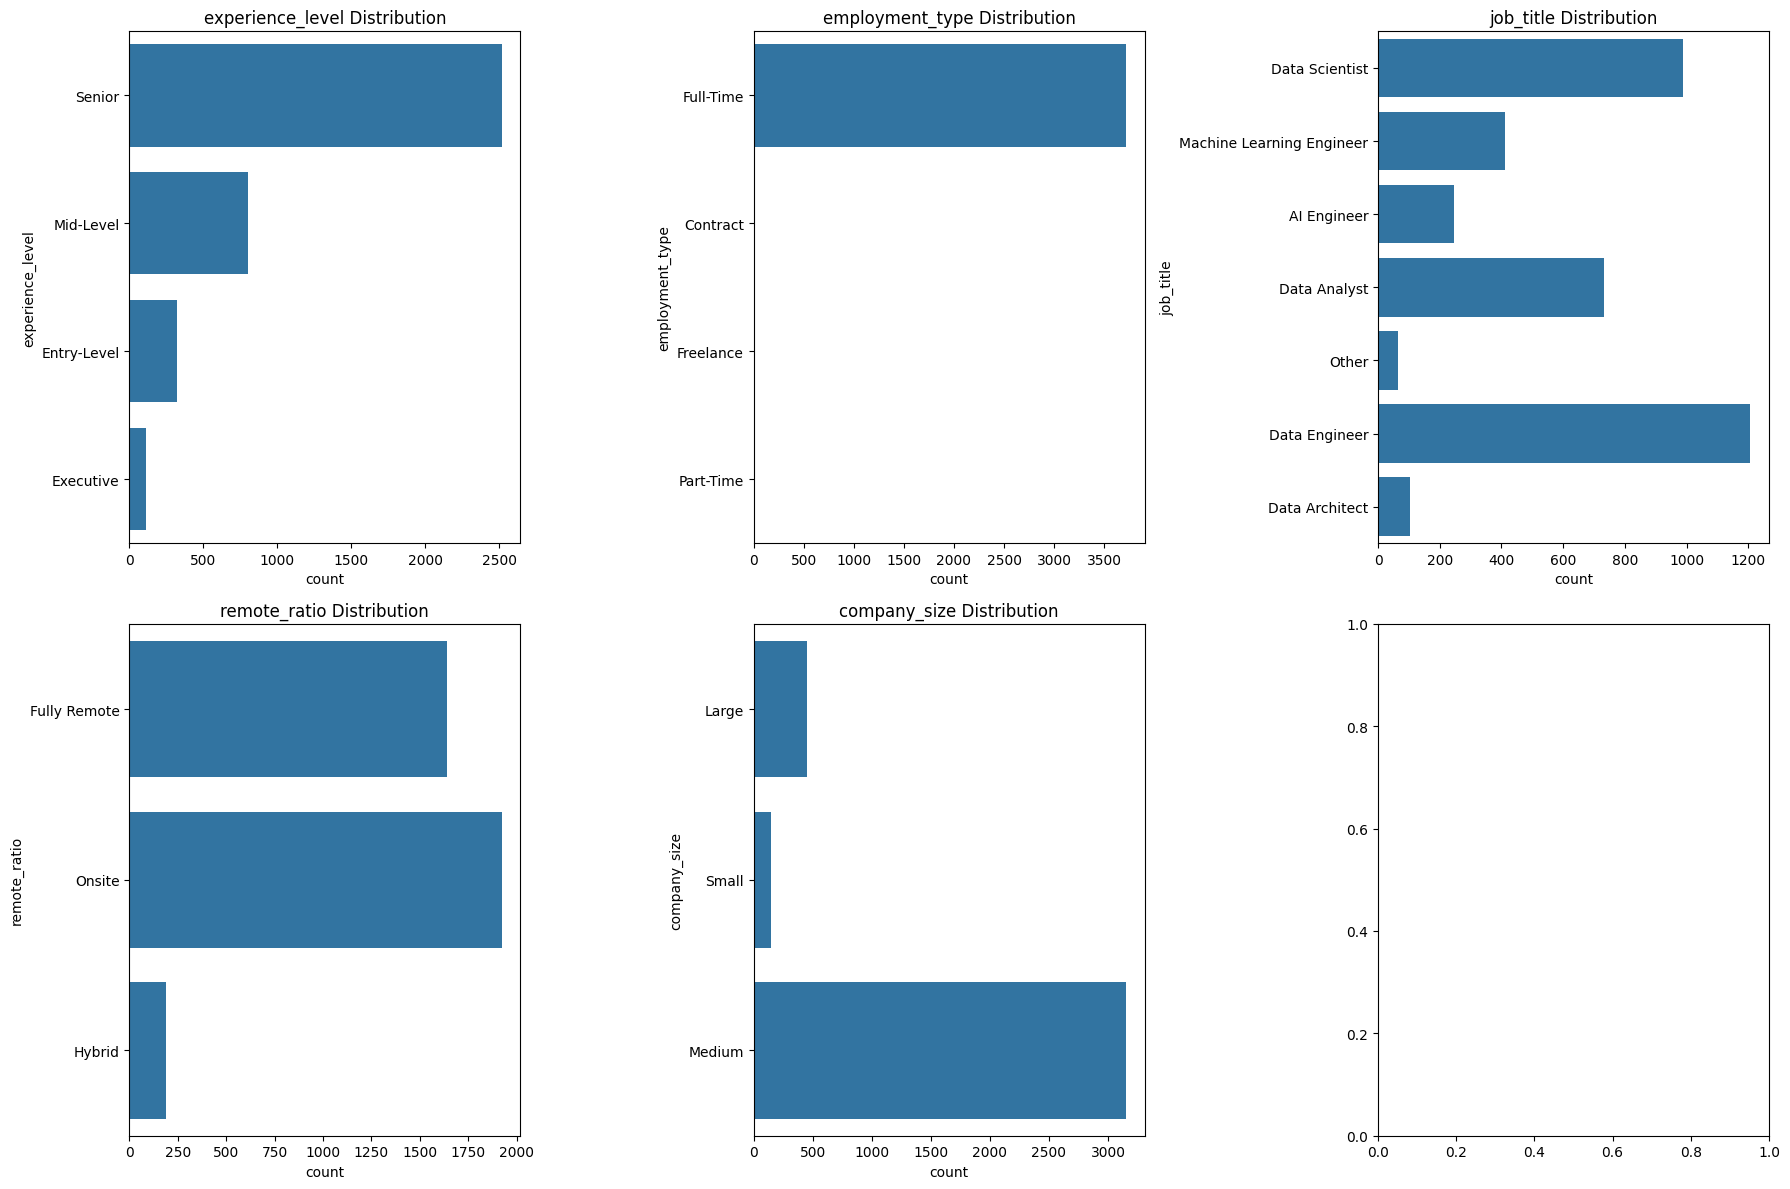

In [96]:
# Visulizae Number of records from each categorical columns
cat_cols = df.drop(['employee_residence','company_location'], axis=1).select_dtypes(include='object').columns
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()
for i,j in zip(cat_cols, axes):
    sns.countplot(df[i], ax=j)
    j.set_title(f'{i} Distribution')
plt.tight_layout()
plt.show()

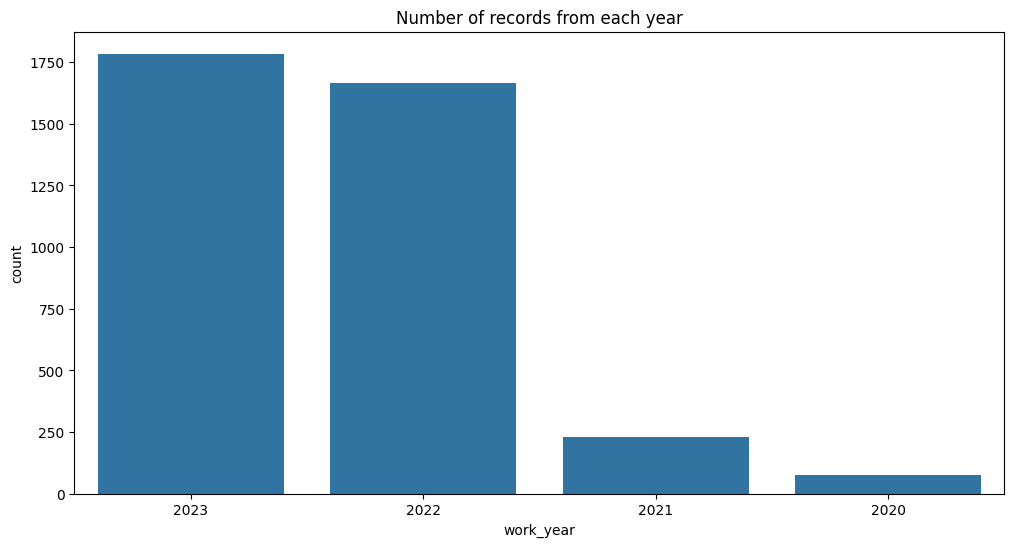

In [98]:
# Count Number of records from each year
plt.figure(figsize=(12, 6))
sns.countplot(df, x='work_year', order=df['work_year'].value_counts().index)
plt.title('Number of records from each year')
plt.show()

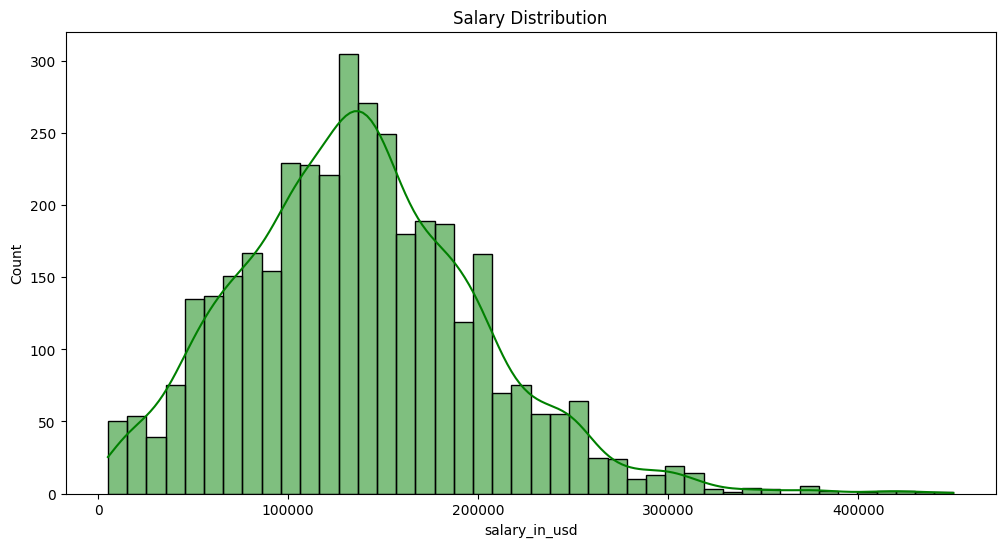

In [99]:
# Discribution of salary 
plt.figure(figsize=(12, 6))
sns.histplot(df['salary_in_usd'], kde=True, color='green')
plt.title('Salary Distribution')
plt.show()

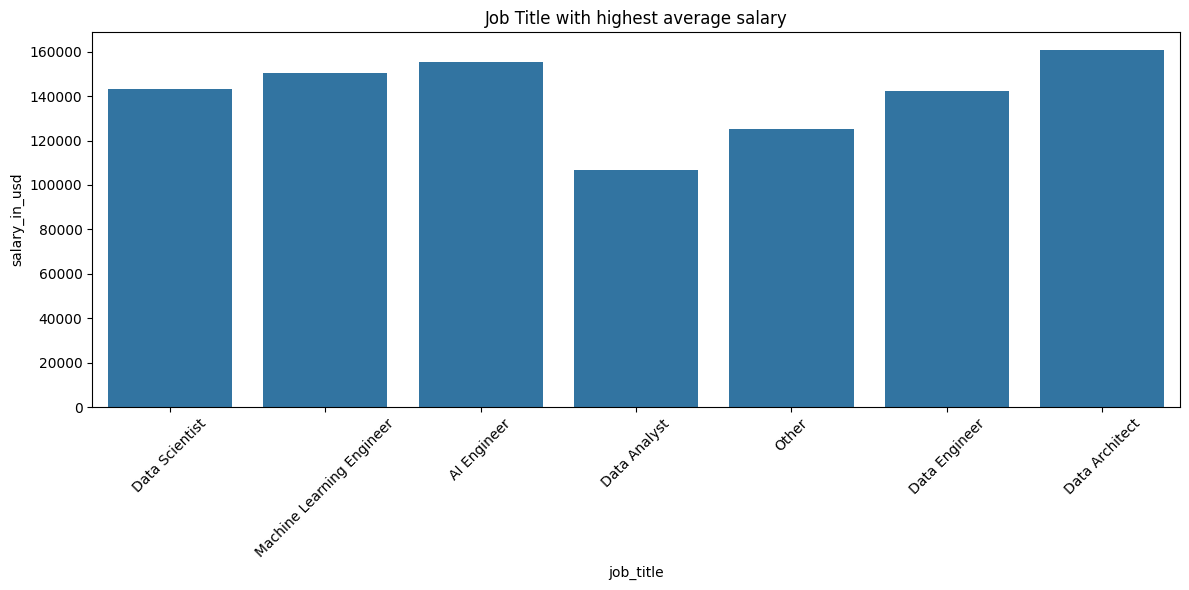

In [105]:
# Job title with highest average salary
plt.figure(figsize=(12, 6))
sns.barplot(x='job_title', y='salary_in_usd', data=df, estimator=np.mean, ci=None)
plt.title('Job Title with highest average salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

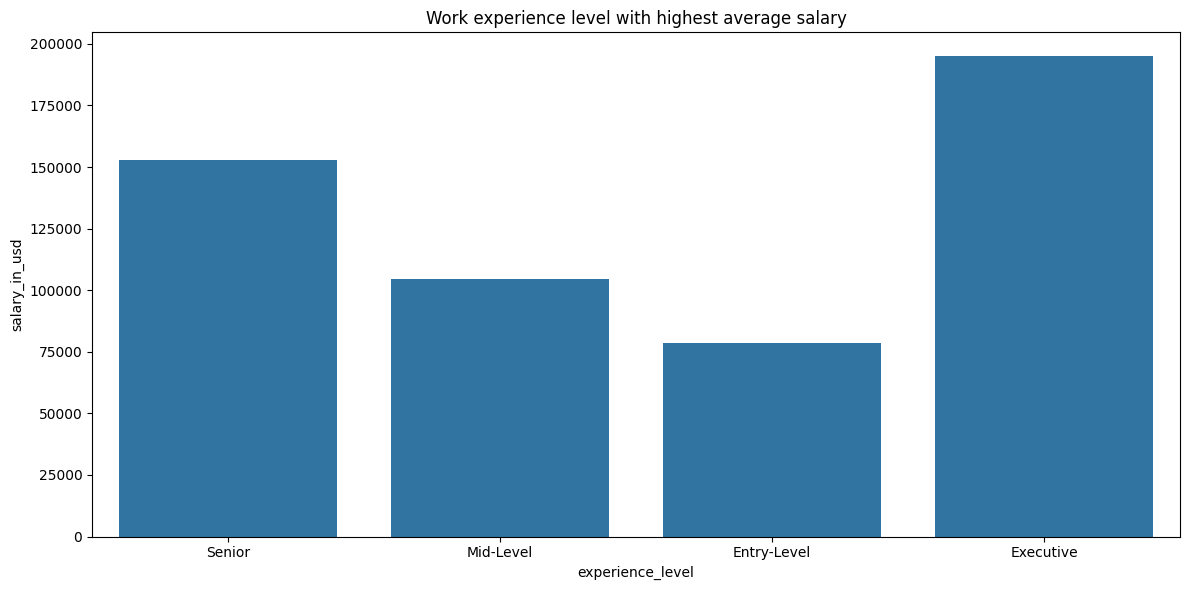

In [108]:
# Work experience level with highest average salary
plt.figure(figsize=(12, 6))
sns.barplot(x='experience_level', y='salary_in_usd', data=df, estimator=np.mean, ci=None)
plt.title('Work experience level with highest average salary')
plt.tight_layout()
plt.show()

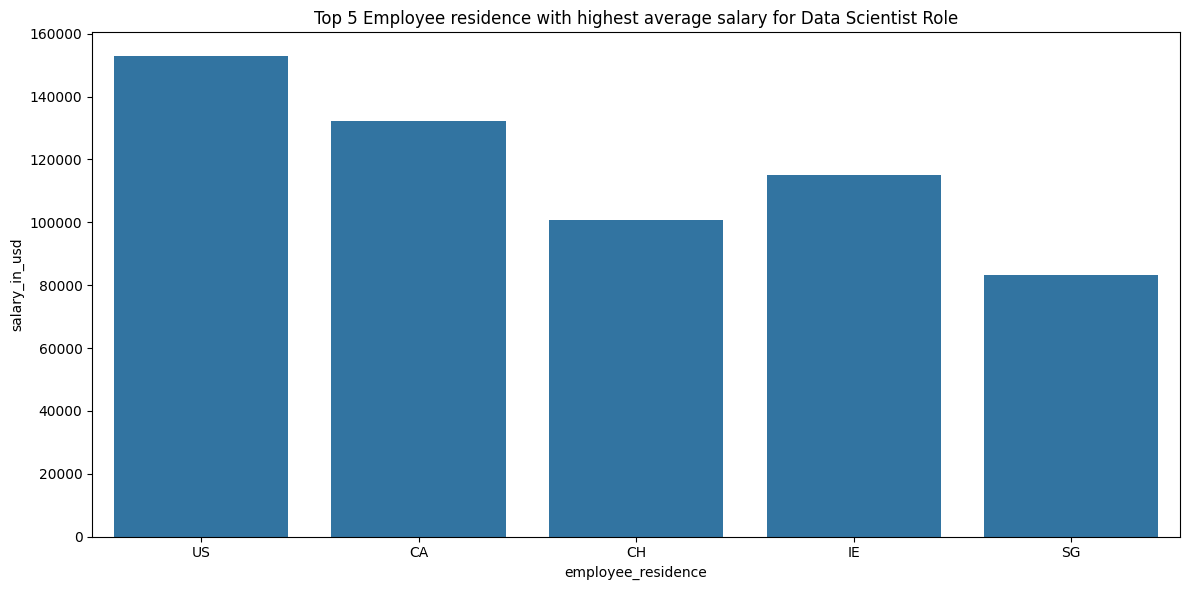

In [111]:
# Top 5 Employee residence with highest average salary for Data Scientist
plt.figure(figsize=(12, 6))
highest_avg_salary_residence = df[df['job_title'] == 'Data Scientist'].groupby('employee_residence')['salary_in_usd'].mean().nlargest(5).index
sns.barplot(x='employee_residence', y='salary_in_usd', data=df[df['employee_residence'].isin(highest_avg_salary_residence)], estimator=np.mean, ci=None)
plt.title('Top 5 Employee residence with highest average salary for Data Scientist Role') 
plt.tight_layout()
plt.show()

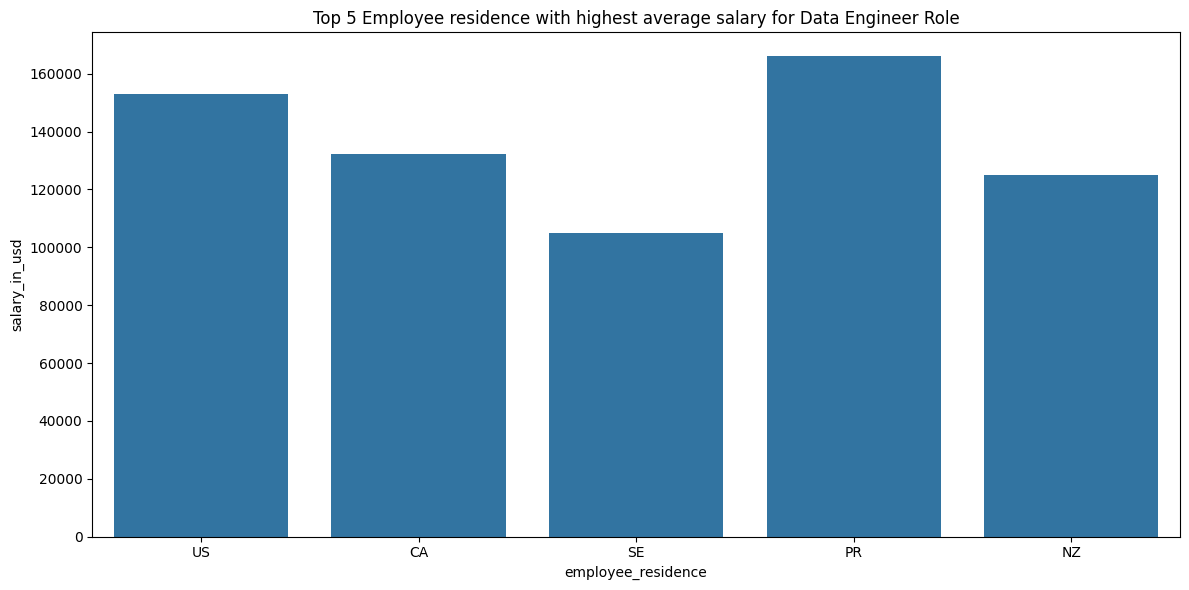

In [112]:
# Top 5 Employee residence with highest average salary for Data Engineer
plt.figure(figsize=(12, 6))
highest_avg_salary_residence = df[df['job_title'] == 'Data Engineer'].groupby('employee_residence')['salary_in_usd'].mean().nlargest(5).index
sns.barplot(x='employee_residence', y='salary_in_usd', data=df[df['employee_residence'].isin(highest_avg_salary_residence)], estimator=np.mean, ci=None)
plt.title('Top 5 Employee residence with highest average salary for Data Engineer Role')
plt.tight_layout()
plt.show()

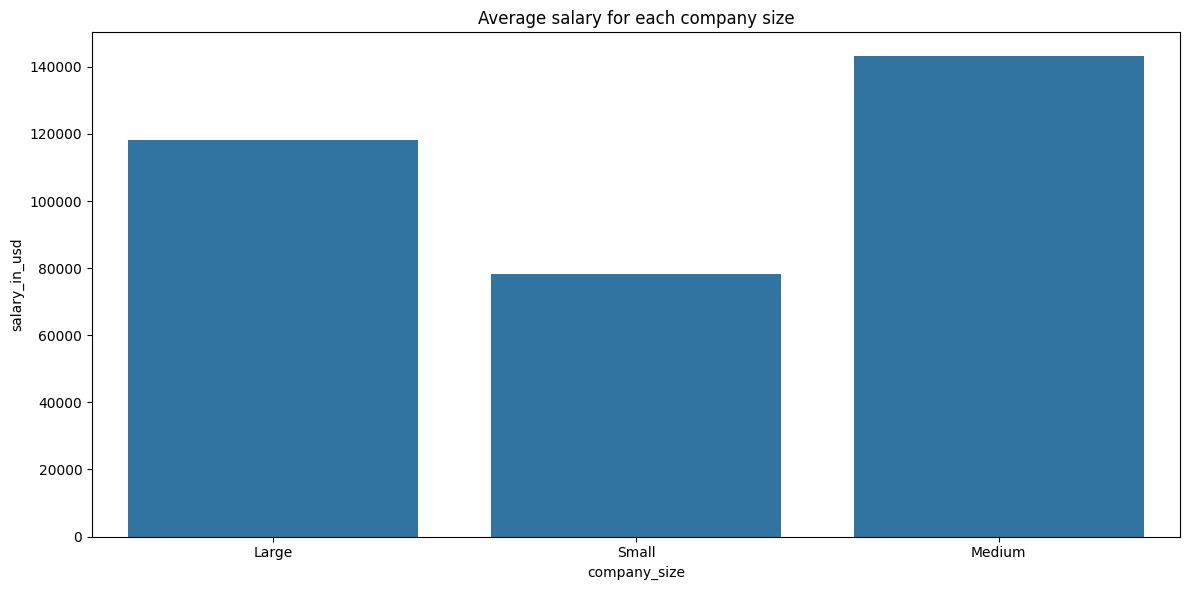

In [113]:
# Average salary for each company size
plt.figure(figsize=(12, 6))
sns.barplot(x='company_size', y='salary_in_usd', data=df, estimator=np.mean, ci=None)
plt.title('Average salary for each company size')
plt.tight_layout()
plt.show()